**Importing Modules**

In [16]:
# Necessary Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

**Loading and Preparing dataset**

In [17]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/wdbc.data"
columns = ["ID", "Diagnosis"] + [f"feature_{i}" for i in range(1, 31)]
data = pd.read_csv(url, header=None, names=columns)

**Dropping unnecessary column**

In [18]:
data = data.drop("ID", axis=1)

**Label Encoding of the "Diagnosis" Column**

In [19]:
label_encoder = LabelEncoder()
data["Diagnosis"] = label_encoder.fit_transform(data["Diagnosis"])

**Feature Scaling Using StandardScaler**

In [20]:
scaler = StandardScaler()
scaled_features = scaler.fit_transform(data.drop("Diagnosis", axis=1))
data_scaled = pd.DataFrame(scaled_features, columns=numerical_columns)
data_scaled["Diagnosis"] = data["Diagnosis"]

**Outliers Detection for Individual Features**

In [29]:
# Outlier Detection for Individual Features
from scipy.stats import zscore

# Calculate Z-scores directly on the DataFrame's numerical columns
z_scores = data_scaled[numerical_columns].apply(zscore)

# Initialize dictionaries to store outlier count and percentage for each feature
outlier_counts = {}
outlier_percentages = {}

# Loop through each feature to calculate outliers individually
for feature in numerical_columns:
    feature_outliers = np.sum(z_scores[feature] > 3)  # Count of outliers in this feature
    outlier_percentage = (feature_outliers / data_scaled.shape[0]) * 100  # Percentage of outliers

    # Store in dictionaries
    outlier_counts[feature] = feature_outliers
    outlier_percentages[feature] = outlier_percentage

    print(f"Feature: {feature}")
    print(f"Outlier Count: {feature_outliers}")
    print(f"Outlier Percentage: {outlier_percentage:.2f}%\n")

# Print summaries for all features
print("Outlier Counts by Feature:", outlier_counts)



Feature: feature_1
Outlier Count: 5
Outlier Percentage: 0.88%

Feature: feature_2
Outlier Count: 4
Outlier Percentage: 0.70%

Feature: feature_3
Outlier Count: 7
Outlier Percentage: 1.23%

Feature: feature_4
Outlier Count: 8
Outlier Percentage: 1.41%

Feature: feature_5
Outlier Count: 4
Outlier Percentage: 0.70%

Feature: feature_6
Outlier Count: 9
Outlier Percentage: 1.58%

Feature: feature_7
Outlier Count: 9
Outlier Percentage: 1.58%

Feature: feature_8
Outlier Count: 6
Outlier Percentage: 1.05%

Feature: feature_9
Outlier Count: 5
Outlier Percentage: 0.88%

Feature: feature_10
Outlier Count: 7
Outlier Percentage: 1.23%

Feature: feature_11
Outlier Count: 7
Outlier Percentage: 1.23%

Feature: feature_12
Outlier Count: 9
Outlier Percentage: 1.58%

Feature: feature_13
Outlier Count: 8
Outlier Percentage: 1.41%

Feature: feature_14
Outlier Count: 6
Outlier Percentage: 1.05%

Feature: feature_15
Outlier Count: 7
Outlier Percentage: 1.23%

Feature: feature_16
Outlier Count: 12
Outlier Per

**Boxplot for Outliers**

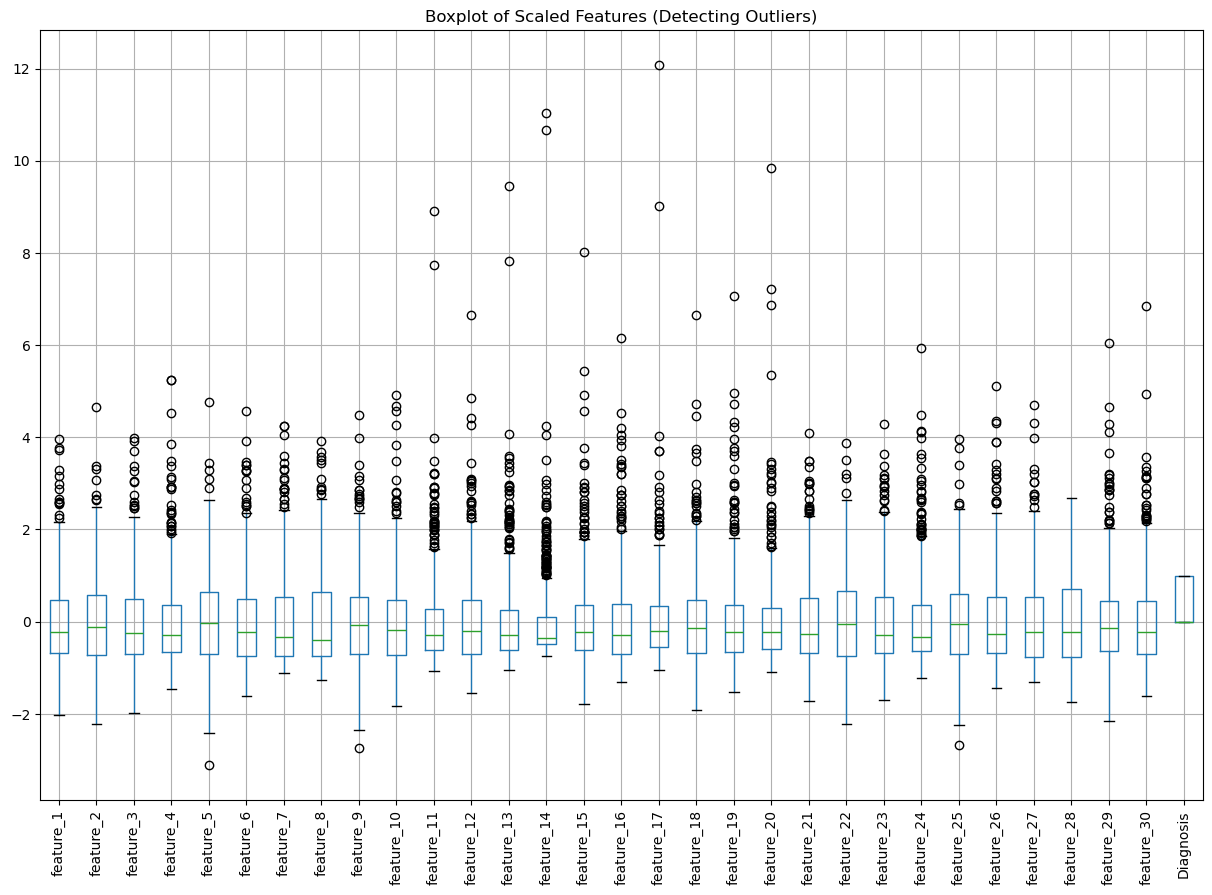

In [22]:
plt.figure(figsize=(15, 10))
data_scaled.boxplot()
plt.title("Boxplot of Scaled Features (Detecting Outliers)")
plt.xticks(rotation=90)
plt.show()

**Remove Outliers**

In [24]:
z_scores = np.abs(zscore(data_scaled[numerical_columns]))
outliers = (z_scores > 3).any(axis=1)
data_no_outliers = data_scaled[~outliers]

**Splitting of data and training the model**

In [27]:
# Separating features and target variable
X = data_no_outliers.drop("Diagnosis", axis=1)
y = data_no_outliers["Diagnosis"]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train AdaBoost Classifier
ada_model = AdaBoostClassifier(n_estimators=50, learning_rate=1.0, random_state=42)
ada_model.fit(X_train, y_train)

# Predict and Evaluate Model Performance
y_pred = ada_model.predict(X_test)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)


C:\Users\HP\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


**Performance Metrics**

In [28]:
# Step 4: Print Performance Metrics
print("\nModel Performance Metrics (After Removing Outliers):")
print(f"{'Metric':<15}{'Score':<10}")
print("-" * 25)
print(f"{'Accuracy':<15}{accuracy:.2f}")
print(f"{'Precision':<15}{precision:.2f}")
print(f"{'Recall':<15}{recall:.2f}")
print(f"{'F1 Score':<15}{f1:.2f}")
print("\nConfusion Matrix:\n", conf_matrix)


Model Performance Metrics (After Removing Outliers):
Metric         Score     
-------------------------
Accuracy       1.00
Precision      1.00
Recall         1.00
F1 Score       1.00

Confusion Matrix:
 [[61  0]
 [ 0 38]]
